In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# import libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [20]:
data = pd.read_csv('/content/sample_data/healthcare-dataset-stroke-data.csv')

In [21]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
data.shape

(5110, 12)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [24]:
data.duplicated().sum()

np.int64(0)

In [25]:
data.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [26]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())

# ***Data Analysis***

## 1- the age distribution of people who had a stroke

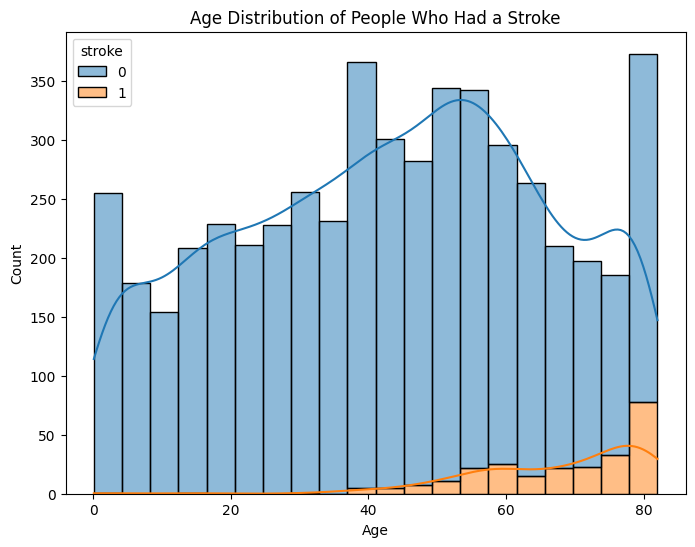

In [27]:

plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', hue='stroke', multiple="stack", kde=True, bins=20)
plt.title('Age Distribution of People Who Had a Stroke')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


## 2- Which work type has the highest percentage of strokes?

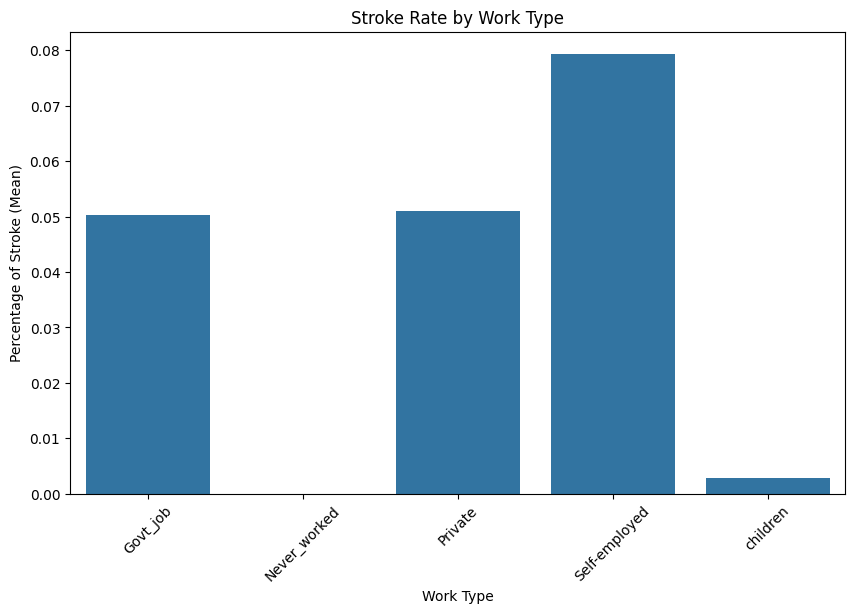

In [28]:
work_type_stroke_rate = data.groupby('work_type')['stroke'].mean()

work_type_stroke_rate = work_type_stroke_rate.reset_index()

# Create a bar plot for the mean stroke rate by work type
plt.figure(figsize=(10, 6))
sns.barplot(x='work_type', y='stroke', data=work_type_stroke_rate)
plt.title('Stroke Rate by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Percentage of Stroke (Mean)')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

## 3- Does gender affect stroke risk?

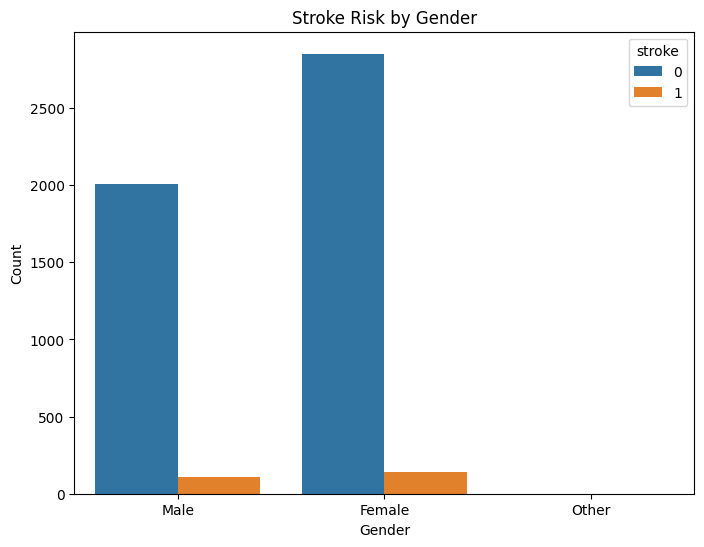

In [29]:

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='stroke', data=data)
plt.title('Stroke Risk by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## 4- Is marital status related to stroke occurrences?

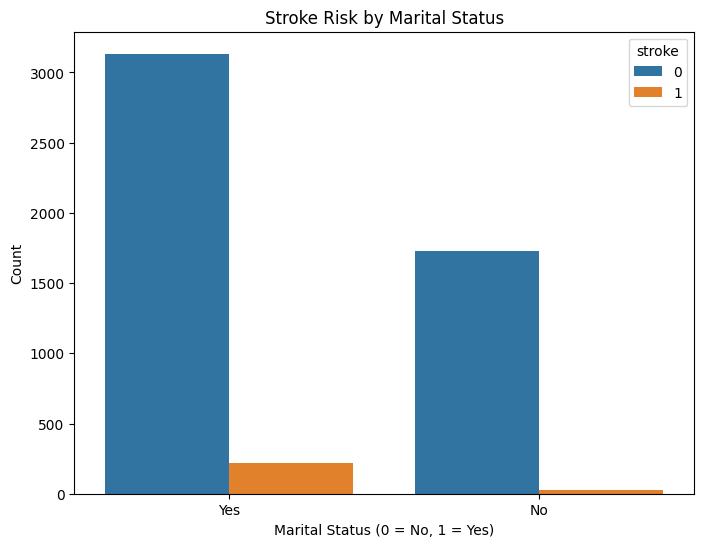

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ever_married', hue='stroke', data=data)
plt.title('Stroke Risk by Marital Status')
plt.xlabel('Marital Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## 5- Do people living in urban areas have more strokes than those in rural areas?

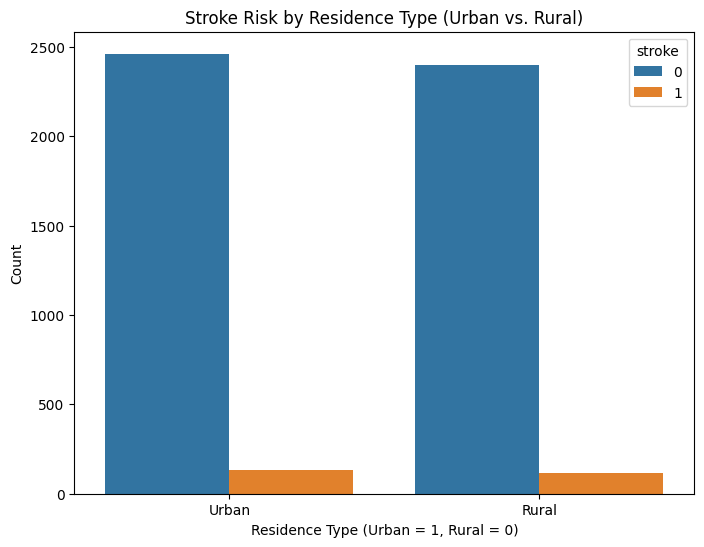

In [31]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Residence_type', hue='stroke', data=data)
plt.title('Stroke Risk by Residence Type (Urban vs. Rural)')
plt.xlabel('Residence Type (Urban = 1, Rural = 0)')
plt.ylabel('Count')
plt.show()

## 6- Does smoking status affect stroke risk?

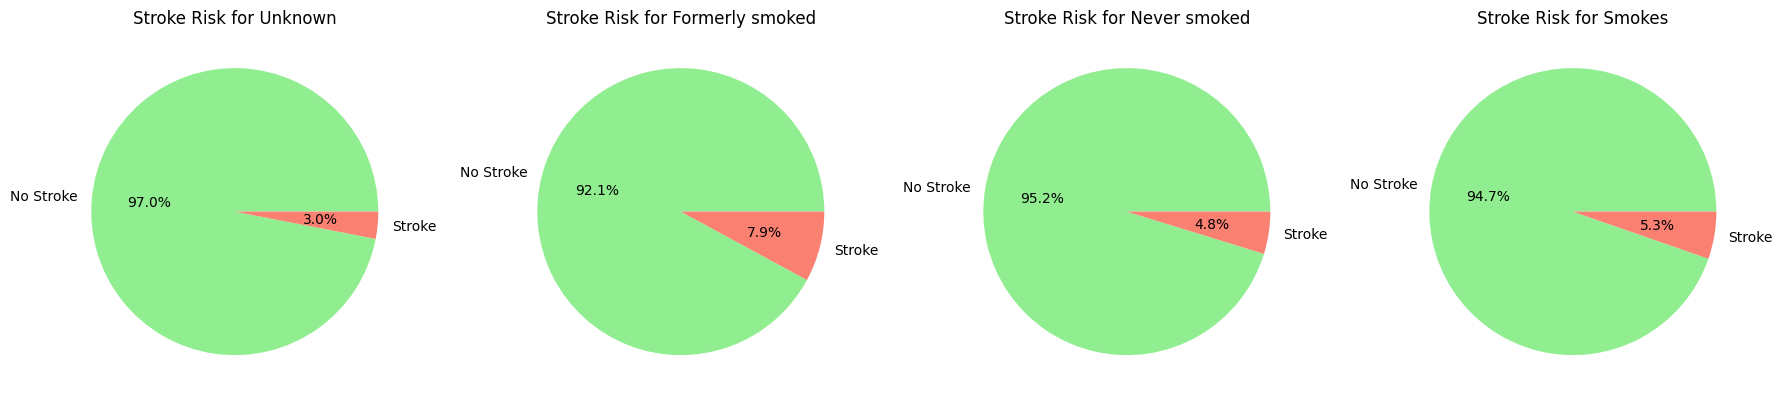

In [32]:
stroke_by_smoking = data.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack().fillna(0)

# Plot pie charts for each smoking status
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

smoking_categories = stroke_by_smoking.index

for i, smoking in enumerate(smoking_categories):
    axes[i].pie(stroke_by_smoking.loc[smoking], labels=['No Stroke', 'Stroke'], autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
    axes[i].set_title(f'Stroke Risk for {smoking.capitalize()}')

plt.tight_layout()
plt.show()


## 7- Is there a relationship between hypertension and stroke?

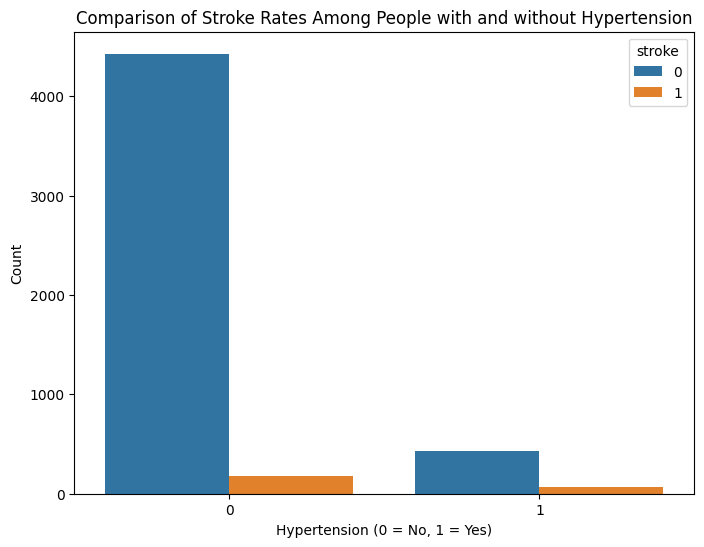

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='stroke', data=data)
plt.title('Comparison of Stroke Rates Among People with and without Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## 8- Do heart disease patients have a higher chance of stroke?

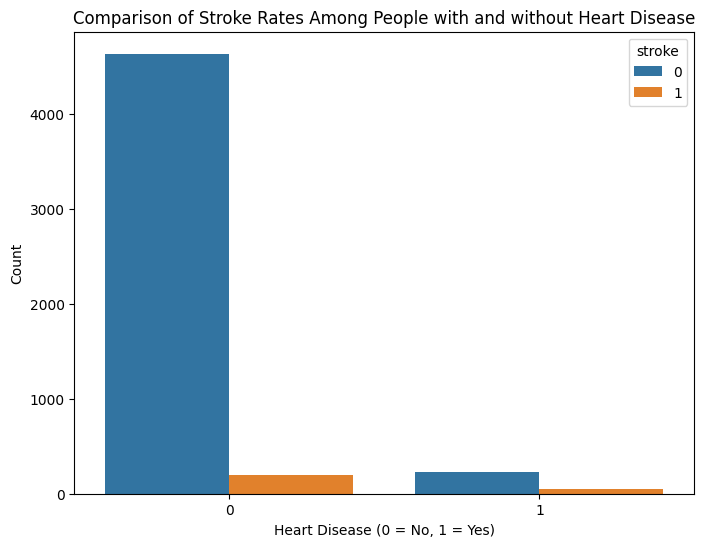

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='stroke', data=data)
plt.title('Comparison of Stroke Rates Among People with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

## 9- What is the average BMI and glucose level of stroke vs. non-stroke?

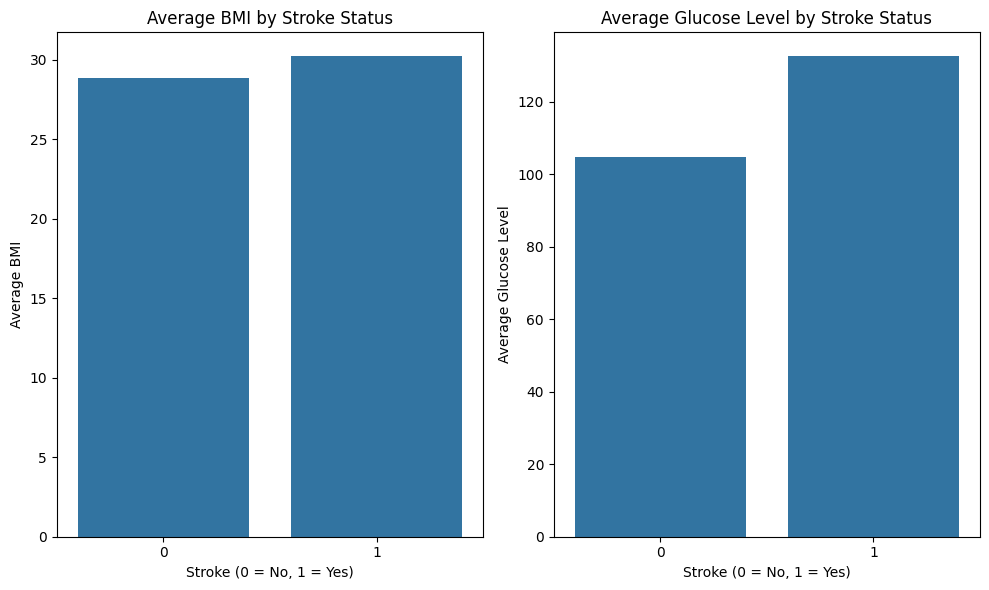

In [35]:
average_values = data.groupby('stroke')[['bmi', 'avg_glucose_level']].mean()

# Reset index for better plotting
average_values.reset_index(inplace=True)

# Create a bar plot for the average BMI and glucose level for stroke vs non-stroke
plt.figure(figsize=(10, 6))

# Plot BMI
plt.subplot(1, 2, 1)
sns.barplot(x='stroke', y='bmi', data=average_values)
plt.title('Average BMI by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average BMI')

# Plot avg_glucose_level
plt.subplot(1, 2, 2)
sns.barplot(x='stroke', y='avg_glucose_level', data=average_values)
plt.title('Average Glucose Level by Stroke Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Average Glucose Level')

plt.tight_layout()
plt.show()


# Handle outliers

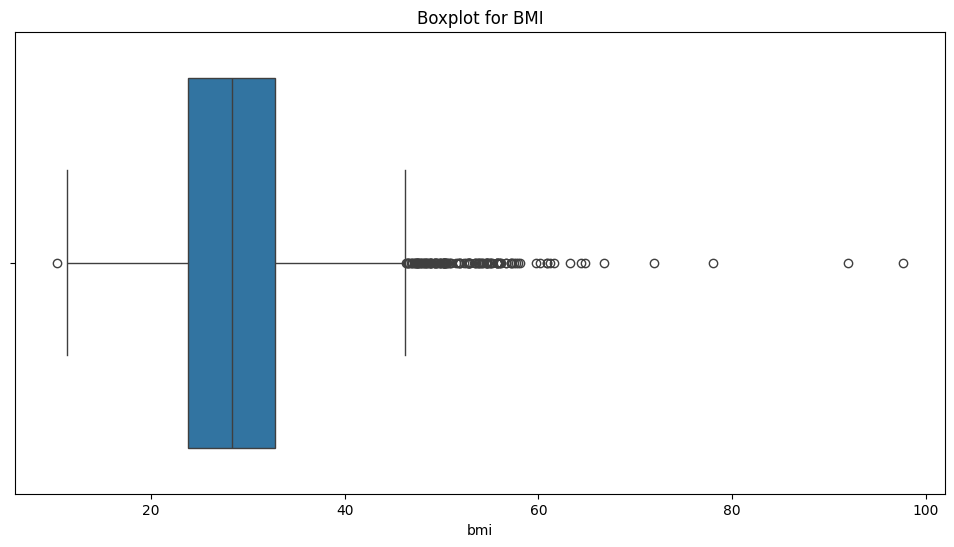

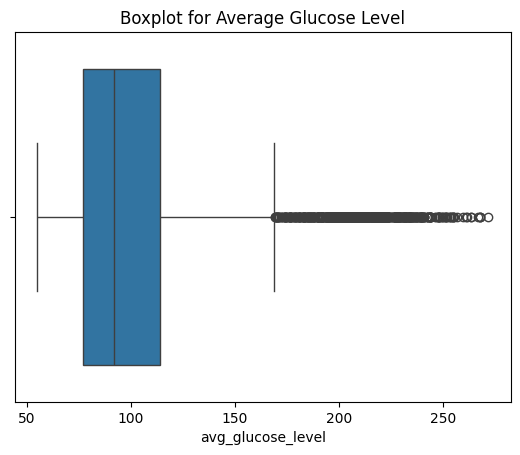

In [36]:

plt.figure(figsize=(12, 6))

# Box plot for BMI
sns.boxplot(x=data['bmi'])
plt.title('Boxplot for BMI')
plt.show()

# Box plot for Average Glucose Level
sns.boxplot(x=data['avg_glucose_level'])
plt.title('Boxplot for Average Glucose Level')
plt.show()

In [37]:
# Calculate the IQR for each feature
Q1 = data[['bmi', 'avg_glucose_level']].quantile(0.25)
Q3 = data[['bmi', 'avg_glucose_level']].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers (keeping values within the bounds)
data_no_outliers = data[~((data[['bmi', 'avg_glucose_level']] < lower_bound) | (data[['bmi', 'avg_glucose_level']] > upper_bound)).any(axis=1)]

# Check the shape before and after removing outliers
print(f"Before removing outliers: {data.shape}")
print(f"After removing outliers: {data_no_outliers.shape}")


Before removing outliers: (5110, 12)
After removing outliers: (4391, 12)


# Data Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply Label Encoding for binary categorical columns
binary_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status', 'stroke']
for col in binary_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Apply One-Hot Encoding for nominal categorical columns
data = pd.get_dummies(data, columns=['work_type', 'Residence_type'], drop_first=True)

print(data.head())


      id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

   avg_glucose_level        bmi  smoking_status  stroke  \
0             228.69  36.600000               1       1   
1             202.21  28.893237               2       1   
2             105.92  32.500000               2       1   
3             171.23  34.400000               3       1   
4             174.12  24.000000               2       1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2          

# feature selection

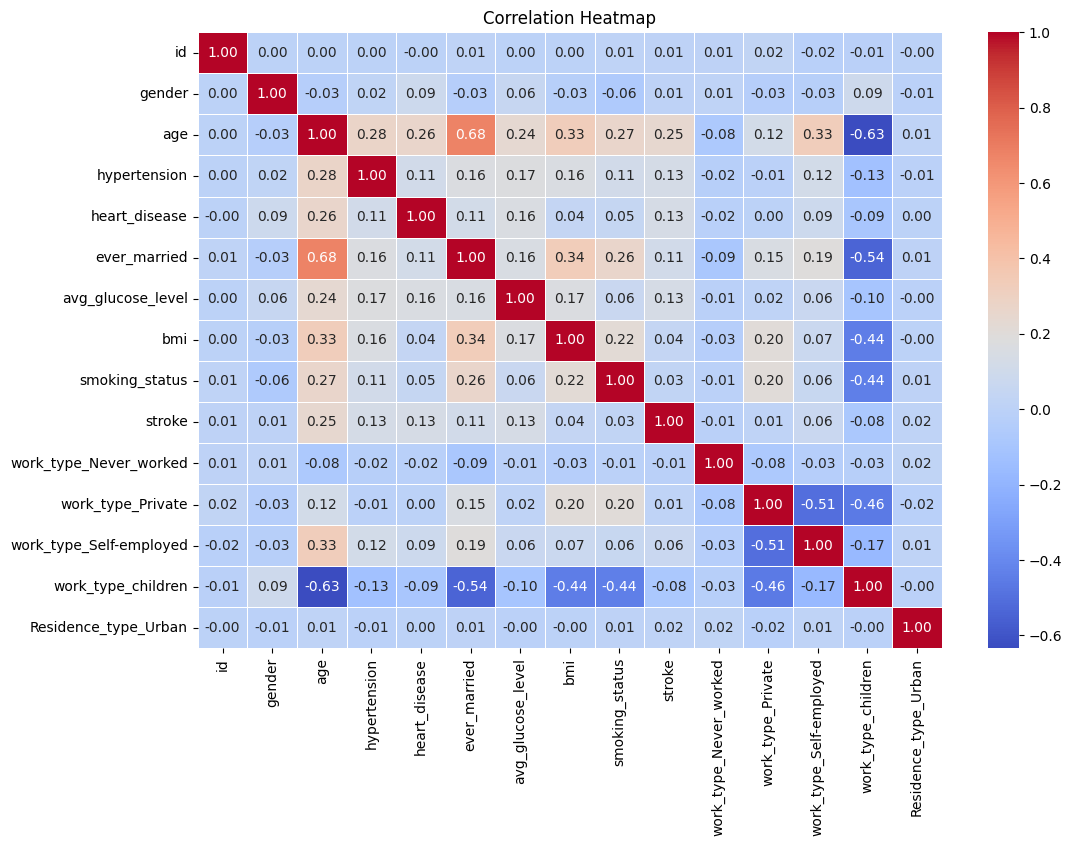

Features with correlation above 0.05 with 'stroke':
Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level', 'stroke', 'work_type_Self-employed',
       'work_type_children'],
      dtype='object')


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

# Plot the correlation matrix (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Define the correlation threshold for feature selection
correlation_threshold = 0.05

# Select features that have a correlation with 'stroke' above the threshold
selected_features = correlation_matrix[abs(correlation_matrix["stroke"]) > correlation_threshold].index

# Print the selected features
print(f"Features with correlation above {correlation_threshold} with 'stroke':")
print(selected_features)


# data implance

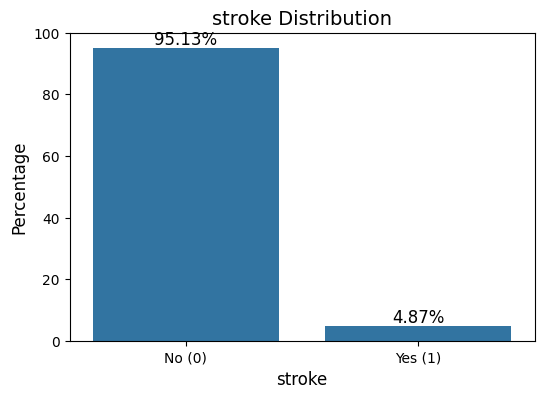

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

stroke_counts = data['stroke'].value_counts(normalize=True) * 100

plt.figure(figsize=(6,4))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values)

plt.title('stroke Distribution', fontsize=14)
plt.xlabel('stroke', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks([0,1], ['No (0)', 'Yes (1)'])
plt.ylim(0, 100)


for i, v in enumerate(stroke_counts.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', fontsize=12)

plt.show()

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X = data.drop(columns=['stroke'])
y = data['stroke']


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


print( Counter(y))
print( Counter(y_resampled))

Counter({0: 4861, 1: 249})
Counter({1: 4861, 0: 4861})


# data scaling

In [44]:
from sklearn.preprocessing import StandardScaler



scaler_standard = StandardScaler()
X_standard_scaled = scaler_standard.fit_transform(X_resampled)



# split data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y_resampled , test_size=0.2, random_state=42)

# Models

In [46]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


## Logistic Regression Model

In [48]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression:
Accuracy: 0.855012853470437


## Naive Bayes

In [49]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes:
Accuracy: 0.6025706940874036


## KNN

In [51]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN:
Accuracy: 0.889974293059126


## Decision Tree

In [52]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree:
Accuracy: 0.9161953727506427


## Random Forest

In [53]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.9460154241645244


## SVM

In [54]:
# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM:
Accuracy: 0.8565552699228792


# Models as table

In [65]:


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Naive Bayes': GaussianNB(),
}

# Initialize an empty dictionary to store metrics
metrics = {}

# Loop through models, train, predict, and store metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store the metrics for each model
    metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }

# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics).T

# Display the metrics table
metrics_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.855013,0.848178,0.863918,0.855975
KNN,0.889974,0.853933,0.940206,0.894995
Decision Tree,0.916195,0.898322,0.938144,0.917801
Random Forest,0.946015,0.933801,0.959794,0.946619
SVM,0.856555,0.850761,0.863918,0.857289
Naive Bayes,0.602571,0.557434,0.985567,0.712104


# chart to compare accuracy

<Figure size 1200x600 with 0 Axes>

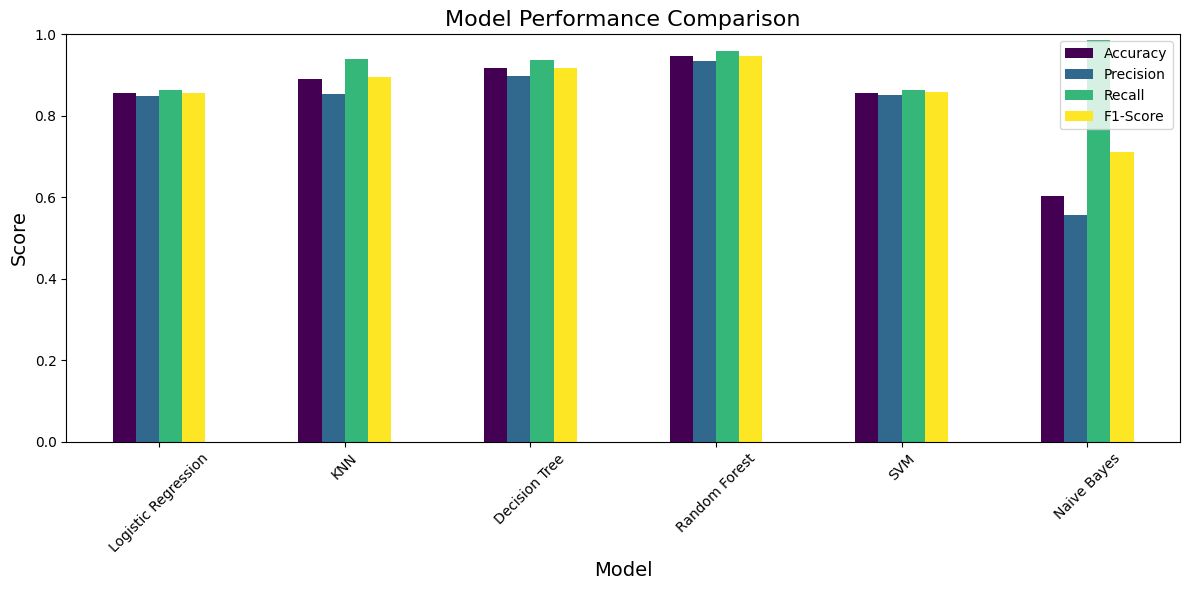

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Accuracy, Precision, Recall, and F1-Score from the actual metrics_df
plt.figure(figsize=(12, 6))
metrics_df.plot(kind='bar', figsize=(12, 6), cmap='viridis')

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Because metric values range from 0 to 1

plt.tight_layout()
plt.show()


# confusion_matrix & classification_report for randomforest model

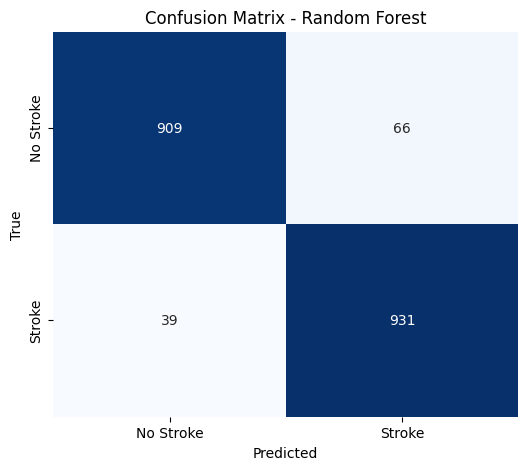

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       975
           1       0.93      0.96      0.95       970

    accuracy                           0.95      1945
   macro avg       0.95      0.95      0.95      1945
weighted avg       0.95      0.95      0.95      1945



In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


rf_model = RandomForestClassifier(random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest:\n")
print(report)
